<a href="https://colab.research.google.com/github/JMML2021/Entrega-projecte-final/blob/main/Calculo_Ryainair2019ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importar librerias:

import numpy as np
import matplotlib as plt
import pandas as pd
import csv
import seaborn as sns
import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
 

In [3]:
path= '/content/drive/MyDrive/Ficheros de Vueling/2019RyanairCORTO.xlsx'
path= '/content/drive/MyDrive/Ficheros de Vueling/2019Ryanair.xlsx'

In [4]:
# Abrir fichero de Github. 

Hoja = '2019Ryamair'
df = pd.read_excel(path, sheet_name=Hoja)


# Analitzo informació de la base de dades.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750954 entries, 0 to 750953
Data columns (total 8 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Mes, Día, Año de Flight_Date_Calculated_TST  750954 non-null  object        
 1   scheduled_gate_departure                     750946 non-null  datetime64[ns]
 2   scheduled_gate_arrival                       750951 non-null  datetime64[ns]
 3   actual_gate_departure                        721061 non-null  datetime64[ns]
 4   actual_gate_arrival                          726993 non-null  datetime64[ns]
 5   tail_number                                  746797 non-null  object        
 6   departure_airport_id                         750954 non-null  object        
 7   arrival_at_cd_airport                        746917 non-null  object        
dtypes: datetime64[ns](4), object(4)
memory usage: 45.8+ MB


In [36]:
# Los nombre de las columnas tienen muchos espacios en blanco

nombreColumnas= df.columns
nombreColumnas

Index(['DATE', 'STD', 'STA', 'ATD', 'ATA', 'REG', 'DEP', 'ARR', 'MES',
       'Setmana', 'DiaSetmana', 'DiaSetmanaName', 'Hour',
       'DuracionVueloTeorico1', 'DuracionVueloReal1', 'E_Duracion_Vuelo1',
       'E_Puntualidad1', 'E_Despegue1', 'Secuencia'],
      dtype='object')

In [64]:
# Aqui corrijo los nombre de las columnas
nombreColumnaCorregido= ['DATE', 'STD', 'STA', 'ATD','ATA', 'REG', 'DEP', 'ARR']
 
                         
# Proceso para cambiar el nombre de las columnas por un bucle FOR
for n, m in enumerate(nombreColumnas):
  print(n, m,'*',nombreColumnaCorregido[n],'-')
  df.rename({m: nombreColumnaCorregido[n]}, axis=1, inplace=True)

df.head()

0 DATE * DATE -
1 STD * STD -
2 STA * STA -
3 ATD * ATD -
4 ATA * ATA -
5 REG * REG -
6 DEP * DEP -
7 ARR * ARR -


IndexError: ignored

## Crear columnes de Mes, hora, etc

In [38]:
df['MES'] = df['STD'].dt.month
df['Setmana'] = df['STD'].dt.week
df['DiaSetmana'] = df['STD'].dt.dayofweek
df['DiaSetmanaName'] = df['STD'].dt.day_name()
df['Hour'] = df['STD'].dt.hour
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,DiaSetmana,DiaSetmanaName,Hour,DuracionVueloTeorico1,DuracionVueloReal1,E_Duracion_Vuelo1,E_Puntualidad1,E_Despegue1,Secuencia
0,1 de abril de 2019,2019-04-01 10:30:00,2019-04-01 12:50:00,2019-04-01 10:43:00,2019-04-01 12:55:00,EI-DAC,MXP,OTP,4.0,14.0,0.0,Monday,10.0,140.0,132.0,-8.0,5.0,13.0,1.0
1,1 de abril de 2019,2019-04-01 13:20:00,2019-04-01 15:45:00,2019-04-01 13:40:00,2019-04-01 16:03:00,EI-DAC,OTP,MXP,4.0,14.0,0.0,Monday,13.0,145.0,143.0,-2.0,18.0,20.0,2.0
2,1 de abril de 2019,2019-04-01 16:10:00,2019-04-01 18:00:00,2019-04-01 16:40:00,2019-04-01 18:20:00,EI-DAC,MXP,PMO,4.0,14.0,0.0,Monday,16.0,110.0,100.0,-10.0,20.0,30.0,3.0
3,1 de abril de 2019,2019-04-01 18:45:00,2019-04-01 20:35:00,2019-04-01 18:58:00,2019-04-01 20:35:00,EI-DAC,PMO,MXP,4.0,14.0,0.0,Monday,18.0,110.0,97.0,-13.0,0.0,13.0,4.0
4,1 de abril de 2019,2019-04-01 05:30:00,2019-04-01 07:20:00,2019-04-01 05:30:00,2019-04-01 07:25:00,EI-DAD,OPO,BCN,4.0,14.0,0.0,Monday,5.0,110.0,115.0,5.0,5.0,0.0,1.0


In [39]:
# Calculo tiempo de vuelo teorico Real y error

df['DuracionVueloTeorico1']= (df['STA'] - df['STD'])/  np.timedelta64(1, 'm') 
df['DuracionVueloReal1'] = (df['ATA'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo1']= df['DuracionVueloReal1']-df['DuracionVueloTeorico1']
df['E_Duracion_Vuelo1'].head(3)

media = round(df['E_Duracion_Vuelo1'].mean(),2)

print('\n\nError medio en tiempo de vuelo',media)



Error medio en tiempo de vuelo -6.24


In [40]:
#Calculo error arrivada:

df['E_Puntualidad1'] = (df['ATA']- df['STA']) /  np.timedelta64(1, 'm')

In [41]:
#Calculo error enlairament:
df['E_Despegue1'] = (df['ATD']- df['STD']) /  np.timedelta64(1, 'm')


## Calcul sequencia del vol per dia

In [ ]:
def cat(x):
    if x > 25  :
        return 'extreme_fear'
        
    if 25 < x < 50:
        return 'fear'
        
    if x == 50  :
        return 'neutral'
        
    if 50 < x <= 75:
        return 'greed'
        
    if x > 75  :
        return 'extreme_greed'

In [128]:

df['Secuencia'] = df.groupby(['DATE', 'REG'])['STD'].rank()
print(df[['Secuencia','REG','STD', 'ARR']][0:45])

    Secuencia     REG                 STD  ARR
0         1.0  EI-DAC 2019-04-01 10:30:00  OTP
1         2.0  EI-DAC 2019-04-01 13:20:00  MXP
2         3.0  EI-DAC 2019-04-01 16:10:00  PMO
3         4.0  EI-DAC 2019-04-01 18:45:00  MXP
4         1.0  EI-DAD 2019-04-01 05:30:00  BCN
5         2.0  EI-DAD 2019-04-01 07:55:00  OPO
6         3.0  EI-DAD 2019-04-01 10:20:00  BRU
7         4.0  EI-DAD 2019-04-01 13:05:00  OPO
8         5.0  EI-DAD 2019-04-01 16:35:00  MXP
9         6.0  EI-DAD 2019-04-01 19:30:00  OPO
10        1.0  EI-DAE 2019-04-01 05:45:00  NRN
11        2.0  EI-DAE 2019-04-01 08:50:00  ALC
12        1.0  EI-DAF 2019-04-01 05:30:00  DUB
13        2.0  EI-DAF 2019-04-01 07:15:00  LTN
14        3.0  EI-DAF 2019-04-01 09:00:00  NOC
15        4.0  EI-DAF 2019-04-01 10:50:00  LTN
16        5.0  EI-DAF 2019-04-01 12:50:00  ORK
17        6.0  EI-DAF 2019-04-01 14:45:00  LTN
18        7.0  EI-DAF 2019-04-01 16:35:00  RMU
19        8.0  EI-DAF 2019-04-01 19:55:00  LTN
20        1.0

In [113]:
value_counts3 = df['Secuencia'].value_counts()

# converting to df and assigning new names to the columns
Sequencies3 = pd.DataFrame(value_counts3)
Sequencies3

,Secuencia
1.0,144225
2.0,142633
3.0,135663
4.0,131298
5.0,87773
...,...
18.0,1
19.0,1
20.0,1
21.0,1


In [116]:
df['DATE']

0              1 de abril de 2019
1              1 de abril de 2019
2              1 de abril de 2019
3              1 de abril de 2019
4              1 de abril de 2019
                   ...           
750949    9 de septiembre de 2019
750950    9 de septiembre de 2019
750951    9 de septiembre de 2019
750952    9 de septiembre de 2019
750953    9 de septiembre de 2019
Name: DATE, Length: 750954, dtype: object

In [118]:
df['Secuencia'] > 10

0         False
1         False
2         False
3         False
4         False
          ...  
750949    False
750950     True
750951     True
750952     True
750953     True
Name: Secuencia, Length: 750954, dtype: bool

In [126]:
df[750940:]

,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,DiaSetmana,DiaSetmanaName,Hour,DuracionVueloTeorico1,DuracionVueloReal1,E_Duracion_Vuelo1,E_Puntualidad1,E_Despegue1,Secuencia
750940,9 de septiembre de 2019,2019-09-09 06:35:00,2019-09-09 10:05:00,2019-09-09 06:29:00,2019-09-09 09:55:00,EI-GXM,MAN,KBP,9.0,37.0,0.0,Monday,6.0,210.0,206.0,-4.0,-10.0,-6.0,1.0
750941,9 de septiembre de 2019,2019-09-09 10:40:00,2019-09-09 14:10:00,2019-09-09 10:42:00,2019-09-09 14:05:00,EI-GXM,KBP,MAN,9.0,37.0,0.0,Monday,10.0,210.0,203.0,-7.0,-5.0,2.0,2.0
750942,9 de septiembre de 2019,2019-09-09 15:10:00,2019-09-09 18:10:00,2019-09-09 15:09:00,2019-09-09 17:47:00,EI-GXM,MAN,FAO,9.0,37.0,0.0,Monday,15.0,180.0,158.0,-22.0,-23.0,-1.0,3.0
750943,9 de septiembre de 2019,2019-09-09 18:35:00,2019-09-09 21:35:00,2019-09-09 18:43:00,2019-09-09 21:42:00,EI-GXM,FAO,MAN,9.0,37.0,0.0,Monday,18.0,180.0,179.0,-1.0,7.0,8.0,4.0
750944,9 de septiembre de 2019,2019-09-09 06:35:00,2019-09-09 08:05:00,2019-09-09 06:35:00,2019-09-09 08:04:00,EI-GXN,CTA,FCO,9.0,37.0,0.0,Monday,6.0,90.0,89.0,-1.0,-1.0,0.0,1.0
750945,9 de septiembre de 2019,2019-09-09 08:40:00,2019-09-09 10:10:00,2019-09-09 08:45:00,2019-09-09 09:55:00,EI-GXN,FCO,CTA,9.0,37.0,0.0,Monday,8.0,90.0,70.0,-20.0,-15.0,5.0,2.0
750946,9 de septiembre de 2019,2019-09-09 10:35:00,2019-09-09 12:35:00,2019-09-09 10:30:00,2019-09-09 12:25:00,EI-GXN,CTA,TRN,9.0,37.0,0.0,Monday,10.0,120.0,115.0,-5.0,-10.0,-5.0,3.0
750947,9 de septiembre de 2019,2019-09-09 13:00:00,2019-09-09 14:50:00,2019-09-09 12:51:00,2019-09-09 14:34:00,EI-GXN,TRN,CTA,9.0,37.0,0.0,Monday,13.0,110.0,103.0,-7.0,-16.0,-9.0,4.0
750948,9 de septiembre de 2019,2019-09-09 16:15:00,2019-09-09 18:00:00,2019-09-09 16:03:00,2019-09-09 17:38:00,EI-GXN,CTA,TSF,9.0,37.0,0.0,Monday,16.0,105.0,95.0,-10.0,-22.0,-12.0,5.0
750949,9 de septiembre de 2019,2019-09-09 18:25:00,2019-09-09 20:05:00,2019-09-09 18:21:00,2019-09-09 19:58:00,EI-GXN,TSF,CTA,9.0,37.0,0.0,Monday,18.0,100.0,97.0,-3.0,-7.0,-4.0,6.0


In [43]:
df1=df.copy()
df1.head()

,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,DiaSetmana,DiaSetmanaName,Hour,DuracionVueloTeorico1,DuracionVueloReal1,E_Duracion_Vuelo1,E_Puntualidad1,E_Despegue1,Secuencia
0,1 de abril de 2019,2019-04-01 10:30:00,2019-04-01 12:50:00,2019-04-01 10:43:00,2019-04-01 12:55:00,EI-DAC,MXP,OTP,4.0,14.0,0.0,Monday,10.0,140.0,132.0,-8.0,5.0,13.0,1.0
1,1 de abril de 2019,2019-04-01 13:20:00,2019-04-01 15:45:00,2019-04-01 13:40:00,2019-04-01 16:03:00,EI-DAC,OTP,MXP,4.0,14.0,0.0,Monday,13.0,145.0,143.0,-2.0,18.0,20.0,2.0
2,1 de abril de 2019,2019-04-01 16:10:00,2019-04-01 18:00:00,2019-04-01 16:40:00,2019-04-01 18:20:00,EI-DAC,MXP,PMO,4.0,14.0,0.0,Monday,16.0,110.0,100.0,-10.0,20.0,30.0,3.0
3,1 de abril de 2019,2019-04-01 18:45:00,2019-04-01 20:35:00,2019-04-01 18:58:00,2019-04-01 20:35:00,EI-DAC,PMO,MXP,4.0,14.0,0.0,Monday,18.0,110.0,97.0,-13.0,0.0,13.0,4.0
4,1 de abril de 2019,2019-04-01 05:30:00,2019-04-01 07:20:00,2019-04-01 05:30:00,2019-04-01 07:25:00,EI-DAD,OPO,BCN,4.0,14.0,0.0,Monday,5.0,110.0,115.0,5.0,5.0,0.0,1.0



# Impacta del aeroport en el retard

In [91]:
# Agrupar per quantiat de vols, 

value_counts = df1['ARR'].value_counts()

# converting to df and assigning new names to the columns
df_aeroports = pd.DataFrame(value_counts)

df_aeroports = df_aeroports.reset_index() 
df_aeroports.columns = ['ARR', 'QuantitatVols'] # change column names
df_aeroports['Grup_Aeroport'] = df_aeroports["QuantitatVols"].apply(lambda x: int(x) if int(x)>19000 else 'Resto')
df_aeroports=pd.DataFrame(df_aeroports)
df_aeroports


,ARR,QuantitatVols,Grup_Aeroport
0,STN,58731,58731
1,DUB,41018,41018
2,BGY,29309,29309
3,BCN,22893,22893
4,MAD,19561,19561
...,...,...,...
237,VIE,5,Resto
238,KEF,2,Resto
239,RVN,1,Resto
240,FDH,1,Resto


In [107]:
# Incorporo la columna agrupada de Aeroports creada anteriorment

df1=pd.DataFrame(df1)
resultado= pd.merge(df1, df_aeroports)
resultado.drop(['QuantitatVols'], axis=1)


,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,DiaSetmana,DiaSetmanaName,Hour,DuracionVueloTeorico1,DuracionVueloReal1,E_Duracion_Vuelo1,E_Puntualidad1,E_Despegue1,Secuencia,Grup_Aeroport
0,1 de abril de 2019,2019-04-01 10:30:00,2019-04-01 12:50:00,2019-04-01 10:43:00,2019-04-01 12:55:00,EI-DAC,MXP,OTP,4.0,14.0,0.0,Monday,10.0,140.0,132.0,-8.0,5.0,13.0,1.0,Resto
1,1 de abril de 2019,2019-04-01 16:20:00,2019-04-01 18:25:00,2019-04-01 16:20:00,2019-04-01 18:06:00,EI-DWD,CIA,OTP,4.0,14.0,0.0,Monday,16.0,125.0,106.0,-19.0,-19.0,0.0,5.0,Resto
2,1 de abril de 2019,2019-04-01 16:15:00,2019-04-01 18:25:00,2019-04-01 17:16:00,2019-04-01 19:22:00,EI-DWR,SXF,OTP,4.0,14.0,0.0,Monday,16.0,130.0,126.0,-4.0,57.0,61.0,5.0,Resto
3,1 de abril de 2019,2019-04-01 05:20:00,2019-04-01 07:30:00,2019-04-01 05:20:00,2019-04-01 07:20:00,EI-DWT,SXF,OTP,4.0,14.0,0.0,Monday,5.0,130.0,120.0,-10.0,-10.0,0.0,1.0,Resto
4,1 de abril de 2019,2019-04-01 05:00:00,2019-04-01 06:05:00,2019-04-01 04:48:00,2019-04-01 05:39:00,EI-EFE,TSR,OTP,4.0,14.0,0.0,Monday,5.0,65.0,51.0,-14.0,-26.0,-12.0,2.0,Resto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746912,14 de noviembre de 2019,2019-11-14 07:00:00,NaT,NaT,NaT,NaN,VCV,KEF,11.0,46.0,3.0,Thursday,7.0,NaN,NaN,NaN,NaN,NaN,3559.0,Resto
746913,26 de noviembre de 2019,2019-11-26 06:00:00,NaT,NaT,NaT,EI-DCL,VCV,KEF,11.0,48.0,1.0,Tuesday,6.0,NaN,NaN,NaN,NaN,NaN,1.0,Resto
746914,15 de diciembre de 2019,2019-12-15 08:00:00,2019-12-15 11:40:00,NaT,NaT,EI-GDY,SNN,RVN,12.0,50.0,6.0,Sunday,8.0,220.0,NaN,NaN,NaN,NaN,1.0,Resto
746915,15 de junio de 2019,2019-06-15 14:40:00,2019-06-15 16:40:00,2019-06-15 14:36:00,NaT,EI-EFK,PMI,FDH,6.0,24.0,5.0,Saturday,14.0,120.0,NaN,NaN,NaN,-4.0,3.0,Resto


In [105]:
# Filtro els outliers

df3=resultado.copy()
dfEliminarOutliers= ((resultado['Secuencia']== 1) & (resultado['E_Despegue1']< 30) & (resultado['E_Despegue1']> -30))

df3 = df3[dfEliminarOutliers]

Text(0.5, 0.98, 'filtrat outliers')

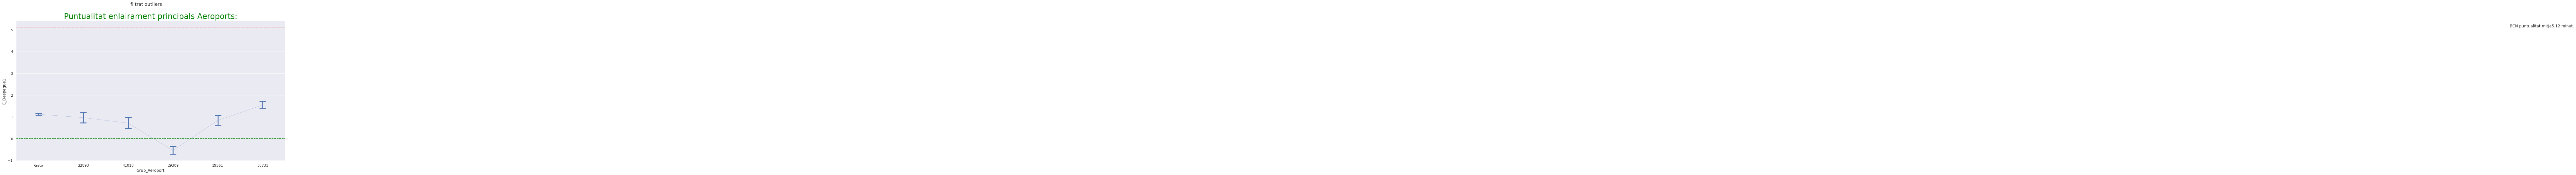

In [111]:
# Intervalos de Confianza por aeropuerto

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='Grup_Aeroport', y = "E_Despegue1", data= df3, scale=.1, kind = "point", capsize=0.13)

puntualidadBCN = round((df2['E_Despegue1'].mean()),2)#

ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN puntualitat mitja"+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN +50 ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualitat enlairament principals Aeroports:', fontsize = 24, color= 'green')
plt.suptitle(f'filtrat outliers')

# df2 Seqüencia 1 - Barcelona

In [51]:
# Filtre primer enlairament a Barcelona

vuelosPrimerDespegue= ((df1['Secuencia']== 1) & (df1['DEP']=='BCN'))
df2 = df1[vuelosPrimerDespegue]
print(df2[['DATE','REG', 'Secuencia','STD']][0:8])

                    DATE     REG  Secuencia                 STD
193   1 de abril de 2019  EI-DHF        1.0 2019-04-01 04:05:00
214   1 de abril de 2019  EI-DHR        1.0 2019-04-01 04:00:00
294   1 de abril de 2019  EI-DLJ        1.0 2019-04-01 04:15:00
528   1 de abril de 2019  EI-DWM        1.0 2019-04-01 04:20:00
774   1 de abril de 2019  EI-EBW        1.0 2019-04-01 06:40:00
947   1 de abril de 2019  EI-EKN        1.0 2019-04-01 06:30:00
1554  1 de abril de 2019  EI-FOK        1.0 2019-04-01 04:30:00
1566  1 de abril de 2019  EI-FOM        1.0 2019-04-01 05:50:00


Text(0.5, 0, 'Error (minuts)')

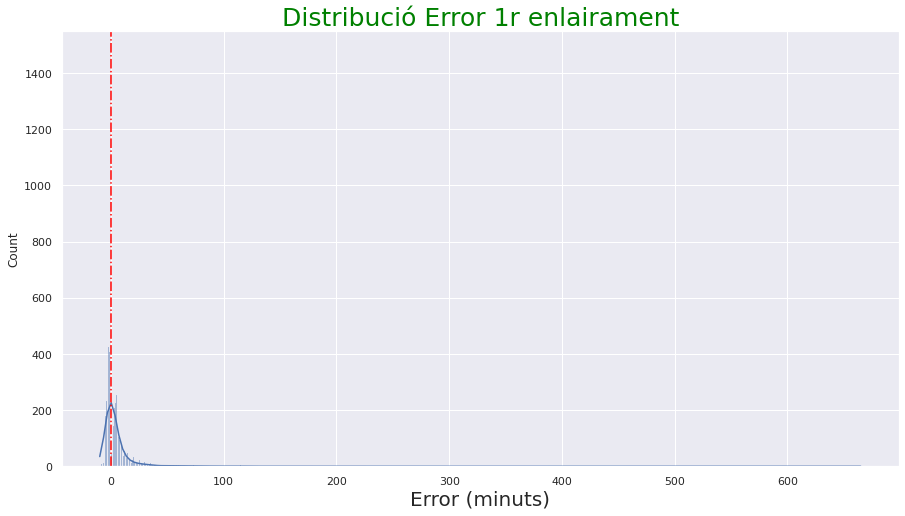

In [52]:
plt.figure(figsize = (15,8))
p= sns.histplot(data= df2.E_Despegue1, kde= True)
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
p.set_title('Distribució Error 1r enlairament', fontsize=25, color='green')
p.set_xlabel("Error (minuts)", fontsize = 20)


Mitjana filtrada =  2.05 minuts


Text(0.5, 0, 'Error (minuts)')

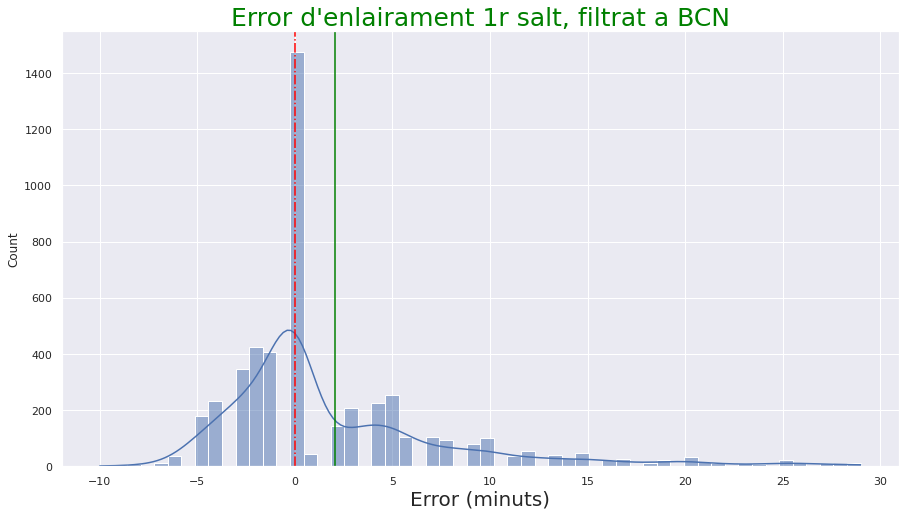

In [53]:
# Eliminar los outliers
df2=df2.copy()
dfEliminarOutliers= ((df2['Secuencia']== 1) & (df2['E_Despegue1']< 30) & (df2['E_Despegue1']> -30))

df2 = df2[dfEliminarOutliers]
#
plt.figure(figsize = (15,8))
p= sns.histplot(data= df2.E_Despegue1, kde= True)
p.set_title("Error d'enlairament 1r salt, filtrat a BCN", fontsize=25, color='green')
mediaFiltrada = round(df2['E_Despegue1'].mean(),2)
p.axvline(mediaFiltrada, 0,12, color = 'green')                       # Media real
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
print()
print('Mitjana filtrada = ', mediaFiltrada, 'minuts')
#print(df2[['Secuencia', 'E_Despegue', 'AeropuertoKey1' ]]) 
p.set_xlabel("Error (minuts)", fontsize = 20)

Text(0.5, 1.0, 'Puntualitat enlairament per hora del dia:')

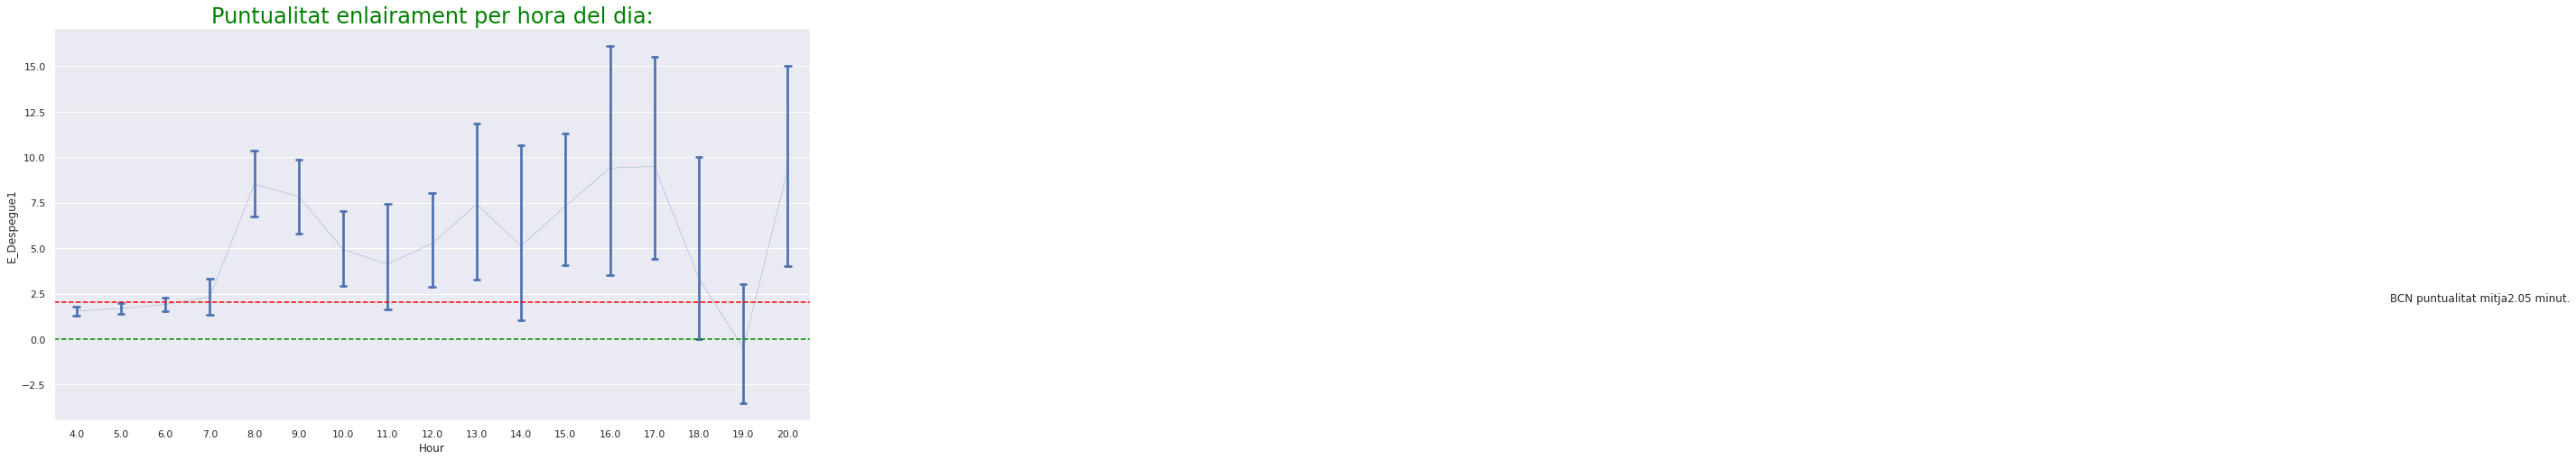

In [54]:
# Intervalos de Confianza por aeropuerto

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='Hour', y = "E_Despegue1", data= df2, scale=.1, kind = "point", capsize=0.13)

puntualidadBCN = round((df2['E_Despegue1'].mean()),2)#

ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN puntualitat mitja"+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN +50 ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualitat enlairament per hora del dia:', fontsize = 24, color= 'green')

# Nueva sección

# Nueva sección

In [55]:
df1

,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,DiaSetmana,DiaSetmanaName,Hour,DuracionVueloTeorico1,DuracionVueloReal1,E_Duracion_Vuelo1,E_Puntualidad1,E_Despegue1,Secuencia
0,1 de abril de 2019,2019-04-01 10:30:00,2019-04-01 12:50:00,2019-04-01 10:43:00,2019-04-01 12:55:00,EI-DAC,MXP,OTP,4.0,14.0,0.0,Monday,10.0,140.0,132.0,-8.0,5.0,13.0,1.0
1,1 de abril de 2019,2019-04-01 13:20:00,2019-04-01 15:45:00,2019-04-01 13:40:00,2019-04-01 16:03:00,EI-DAC,OTP,MXP,4.0,14.0,0.0,Monday,13.0,145.0,143.0,-2.0,18.0,20.0,2.0
2,1 de abril de 2019,2019-04-01 16:10:00,2019-04-01 18:00:00,2019-04-01 16:40:00,2019-04-01 18:20:00,EI-DAC,MXP,PMO,4.0,14.0,0.0,Monday,16.0,110.0,100.0,-10.0,20.0,30.0,3.0
3,1 de abril de 2019,2019-04-01 18:45:00,2019-04-01 20:35:00,2019-04-01 18:58:00,2019-04-01 20:35:00,EI-DAC,PMO,MXP,4.0,14.0,0.0,Monday,18.0,110.0,97.0,-13.0,0.0,13.0,4.0
4,1 de abril de 2019,2019-04-01 05:30:00,2019-04-01 07:20:00,2019-04-01 05:30:00,2019-04-01 07:25:00,EI-DAD,OPO,BCN,4.0,14.0,0.0,Monday,5.0,110.0,115.0,5.0,5.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750949,9 de septiembre de 2019,2019-09-09 18:25:00,2019-09-09 20:05:00,2019-09-09 18:21:00,2019-09-09 19:58:00,EI-GXN,TSF,CTA,9.0,37.0,0.0,Monday,18.0,100.0,97.0,-3.0,-7.0,-4.0,6.0
750950,9 de septiembre de 2019,2019-09-09 07:55:00,2019-09-09 10:35:00,2019-09-09 07:49:00,2019-09-09 10:20:00,NaN,BLQ,SVQ,9.0,37.0,0.0,Monday,7.0,160.0,151.0,-9.0,-15.0,-6.0,2909.0
750951,9 de septiembre de 2019,2019-09-09 09:10:00,2019-09-09 10:35:00,2019-09-09 09:10:00,2019-09-09 10:28:00,NaN,ORK,LGW,9.0,37.0,0.0,Monday,9.0,85.0,78.0,-7.0,-7.0,0.0,2910.0
750952,9 de septiembre de 2019,2019-09-09 12:20:00,2019-09-09 13:10:00,2019-09-09 12:20:00,2019-09-09 12:54:00,NaN,TNG,SVQ,9.0,37.0,0.0,Monday,12.0,50.0,34.0,-16.0,-16.0,0.0,2911.0


In [56]:
#Calculo error primer despegue despegue:


In [57]:
df.head()

,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,DiaSetmana,DiaSetmanaName,Hour,DuracionVueloTeorico1,DuracionVueloReal1,E_Duracion_Vuelo1,E_Puntualidad1,E_Despegue1,Secuencia
0,1 de abril de 2019,2019-04-01 10:30:00,2019-04-01 12:50:00,2019-04-01 10:43:00,2019-04-01 12:55:00,EI-DAC,MXP,OTP,4.0,14.0,0.0,Monday,10.0,140.0,132.0,-8.0,5.0,13.0,1.0
1,1 de abril de 2019,2019-04-01 13:20:00,2019-04-01 15:45:00,2019-04-01 13:40:00,2019-04-01 16:03:00,EI-DAC,OTP,MXP,4.0,14.0,0.0,Monday,13.0,145.0,143.0,-2.0,18.0,20.0,2.0
2,1 de abril de 2019,2019-04-01 16:10:00,2019-04-01 18:00:00,2019-04-01 16:40:00,2019-04-01 18:20:00,EI-DAC,MXP,PMO,4.0,14.0,0.0,Monday,16.0,110.0,100.0,-10.0,20.0,30.0,3.0
3,1 de abril de 2019,2019-04-01 18:45:00,2019-04-01 20:35:00,2019-04-01 18:58:00,2019-04-01 20:35:00,EI-DAC,PMO,MXP,4.0,14.0,0.0,Monday,18.0,110.0,97.0,-13.0,0.0,13.0,4.0
4,1 de abril de 2019,2019-04-01 05:30:00,2019-04-01 07:20:00,2019-04-01 05:30:00,2019-04-01 07:25:00,EI-DAD,OPO,BCN,4.0,14.0,0.0,Monday,5.0,110.0,115.0,5.0,5.0,0.0,1.0


Text(0.5, 0, 'Error (minuts)')

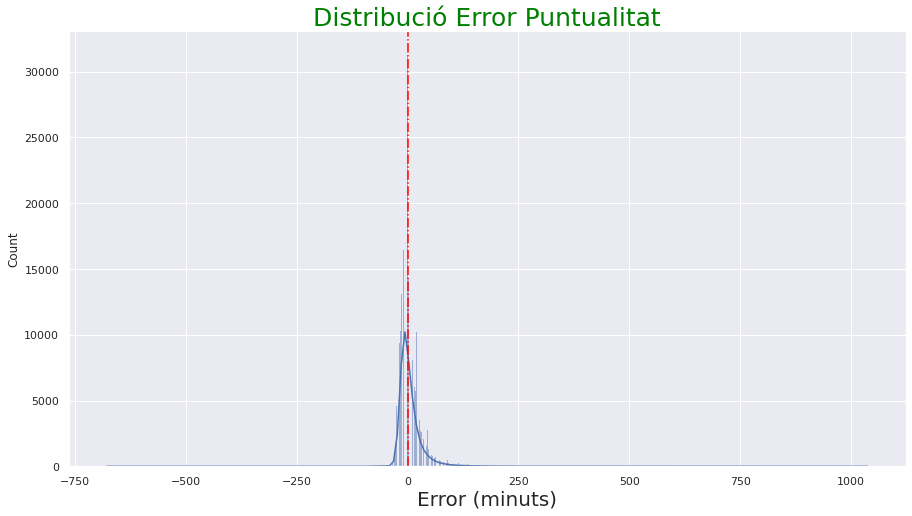

In [58]:
plt.figure(figsize = (15,8))
p= sns.histplot(data= df.E_Puntualidad1, kde= True)
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
p.set_title('Distribució Error Puntualitat', fontsize=25, color='green')
p.set_xlabel("Error (minuts)", fontsize = 20)


Mitjana filtrada =  -1.47 minuts


Text(0.5, 0, 'Error (minuts)')

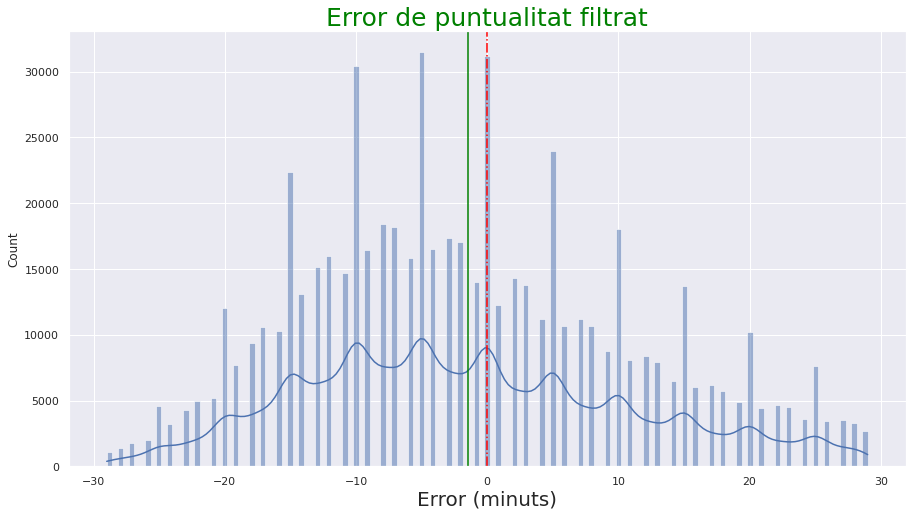

In [59]:
# Eliminar los outliers
df2=df.copy()
dfEliminarOutliers= ( (df2['E_Puntualidad1']< 30) & (df2['E_Puntualidad1']> -30))

df2 = df2[dfEliminarOutliers]
#
plt.figure(figsize = (15,8))
p= sns.histplot(data= df2.E_Puntualidad1, kde= True)
p.set_title("Error de puntualitat filtrat", fontsize=25, color='green')

mediaFiltrada = round(df2['E_Puntualidad1'].mean(),2)
p.axvline(mediaFiltrada, 0,12, color = 'green')                       # Media real
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
print()
print('Mitjana filtrada = ', mediaFiltrada, 'minuts')
#print(df2[['Secuencia', 'E_Despegue', 'AeropuertoKey1' ]]) 
p.set_xlabel("Error (minuts)", fontsize = 20)

Text(0.5, 1.0, 'Puntualitat enlairament per salt del dia:')

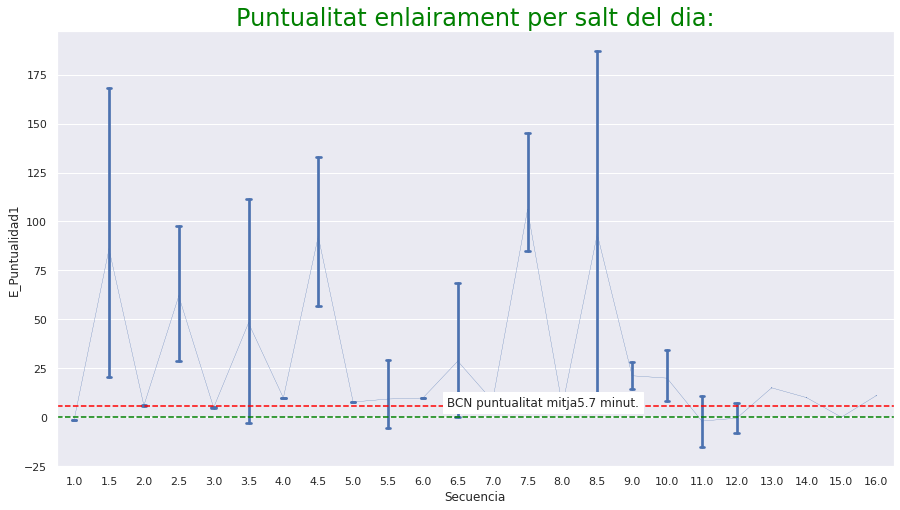

In [127]:
# Intervals de Confianza per salt

#trec totos el registres que no tinc el "REG" d l'avió.
filtered_df = df[df['REG'].notnull()]

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='Secuencia', y = "E_Puntualidad1", data= filtered_df, scale=.1, kind = "point", capsize=0.13)

puntualidadBCN = round((df['E_Puntualidad1'].mean()),2)#

ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN puntualitat mitja"+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN+5 ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualitat enlairament per salt del dia:', fontsize = 24, color= 'green')



In [61]:
guardar = 'No'
# Guardar excel
if guardar != 'No':
  nombreFichero = "D:\Documentos D\02.- Datos Vueling\Ryainair2019_" + Hoja + '_'+ str(fecha) + ".xlsx"

  df3.to_excel(nombreFichero)
  print()
  print('Guardado fichero : ', nombreFichero)
  print()
else:
  print('No guardado')

No guardado


In [62]:
df.Secuencia.max()

4149.5

In [63]:
df2.Secuencia.max()

4148.0